Mean Squared Error (MSE): 26.64
R² Score: 0.2792


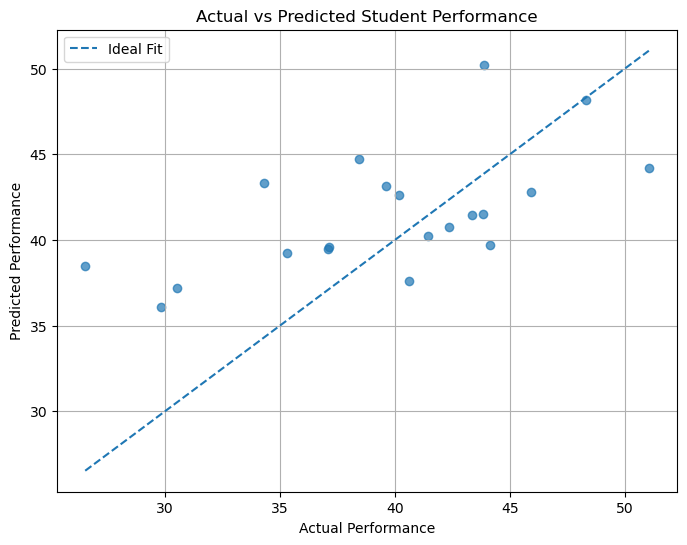

In [8]:
# Multiple Linear Regression: Student Performance Prediction

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Create Synthetic Dataset
# -----------------------------

np.random.seed(42)
num_samples = 100

# Features
study_hours = np.random.randint(1, 10, num_samples)
class_attendance = np.random.randint(50, 100, num_samples)
assignment_scores = np.random.randint(60, 100, num_samples)

# Target Variable (Student Performance)
student_performance = (
    0.5 * study_hours
    + 0.3 * class_attendance
    + 0.2 * assignment_scores
    + np.random.normal(0, 5, num_samples)
)

# Create DataFrame
data = pd.DataFrame({
    "Study Hours": study_hours,
    "Class Attendance": class_attendance,
    "Assignment Scores": assignment_scores,
    "Performance": student_performance
})

# -----------------------------
# Step 2: Split Dataset
# -----------------------------

X = data[["Study Hours", "Class Attendance", "Assignment Scores"]]
y = data["Performance"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Step 3: Train Model
# -----------------------------

model = LinearRegression()
model.fit(X_train, y_train)

# -----------------------------
# Step 4: Make Predictions
# -----------------------------

y_pred = model.predict(X_test)

# -----------------------------
# Step 5: Model Evaluation
# -----------------------------

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", round(mse, 2))
print("R² Score:", round(r2, 4))

# -----------------------------
# Step 6: Visualization
# -----------------------------

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--",
    label="Ideal Fit"
)
plt.title("Actual vs Predicted Student Performance")
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.legend()
plt.grid(True)
plt.show()
